# Introduction 

This code is inspired from [John's Article](https://www.codearmo.com/python-tutorial/options-trading-black-scholes-model)



# Importing the Libraries

In [6]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot

phi = norm.cdf

In [16]:

def callOptionPrice(
        stockPrice: float,
        strikePrice: float, 
        riskFreeRate: float,
        volatility: float,
        timeToExpirationYr: float,
) -> float:
    d1 =  (np.log(stockPrice/strikePrice) + (riskFreeRate + volatility**2/2)*timeToExpirationYr)/(volatility*np.sqrt(timeToExpirationYr))
    d2 = d1 - volatility*np.sqrt(timeToExpirationYr)
    price = stockPrice*phi(d1) - strikePrice*np.exp(-riskFreeRate*timeToExpirationYr)*phi(d2)
    return price

def putOptionPrice(
        stockPrice: float,
        strikePrice: float, 
        riskFreeRate: float,
        volatility: float,
        timeToExpirationYr: float,
) -> float:
    d1 =  (np.log(stockPrice/strikePrice) + (riskFreeRate + volatility**2/2)*timeToExpirationYr)/(volatility*np.sqrt(timeToExpirationYr))
    d2 = d1 - volatility*np.sqrt(timeToExpirationYr)
    price = strikePrice*np.exp(-riskFreeRate*timeToExpirationYr)*phi(-d2) - stockPrice*phi(-d1)
    return price

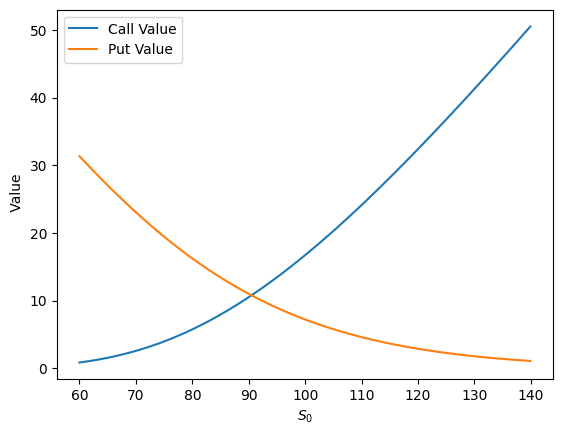

In [17]:
strikePrice = 100
riskFreeRate = 0.1
timeToExpirationYr = 1
volatility = 0.3
stockPrices = np.arange(60,140,0.1)

calls = [callOptionPrice(stockPrice, strikePrice, riskFreeRate, volatility, timeToExpirationYr) for stockPrice in stockPrices]
puts = [putOptionPrice(stockPrice, strikePrice, riskFreeRate, volatility, timeToExpirationYr) for stockPrice in stockPrices]
pyplot.plot(stockPrices,calls, label='Call Value')
pyplot.plot(stockPrices,puts, label='Put Value')
pyplot.xlabel('$S_0$')
pyplot.ylabel(' Value') 
pyplot.legend()

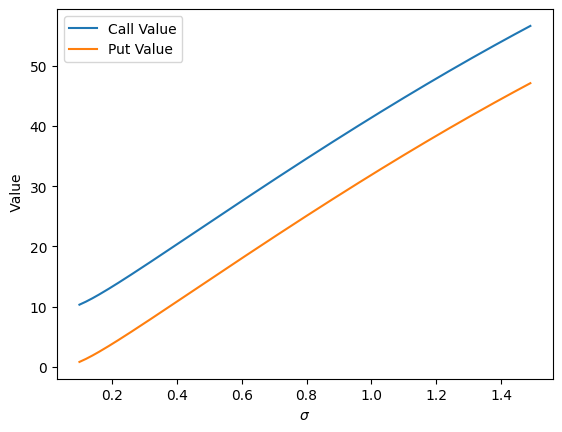

In [18]:
strikePrice = 100
riskFreeRate = 0.1
timeToExpirationYr = 1
volatilities = np.arange(0.1, 1.5, 0.01)
stockPrice = 100

calls = [callOptionPrice(stockPrice, strikePrice, riskFreeRate, volatility, timeToExpirationYr) for volatility in volatilities]
puts = [putOptionPrice(stockPrice, strikePrice, riskFreeRate, volatility, timeToExpirationYr) for volatility in volatilities]
pyplot.plot(volatilities, calls, label='Call Value')
pyplot.plot(volatilities, puts, label='Put Value')
pyplot.xlabel('$\sigma$')
pyplot.ylabel(' Value') 
pyplot.legend()

/var/folders/5t/zjst3f1d2739d6g6nv10_1_00000gn/T/ipykernel_80038/4189569430.py:8: RuntimeWarning: invalid value encountered in scalar divide
  d1 =  (np.log(stockPrice/strikePrice) + (riskFreeRate + volatility**2/2)*timeToExpirationYr)/(volatility*np.sqrt(timeToExpirationYr))


/var/folders/5t/zjst3f1d2739d6g6nv10_1_00000gn/T/ipykernel_80038/4189569430.py:20: RuntimeWarning: invalid value encountered in scalar divide
  d1 =  (np.log(stockPrice/strikePrice) + (riskFreeRate + volatility**2/2)*timeToExpirationYr)/(volatility*np.sqrt(timeToExpirationYr))


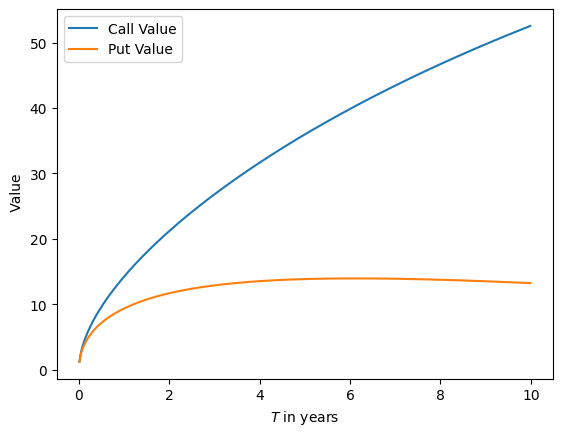

In [22]:
strikePrice = 100
riskFreeRate = 0.05
timeToExpirationYrs = np.arange(0, 10, 0.01)
volatilities = 0.3
stockPrice = 100

calls = [callOptionPrice(stockPrice, strikePrice, riskFreeRate, volatility, timeToExpirationYr) for timeToExpirationYr in timeToExpirationYrs]
puts = [putOptionPrice(stockPrice, strikePrice, riskFreeRate, volatility, timeToExpirationYr) for timeToExpirationYr in timeToExpirationYrs]
pyplot.plot(timeToExpirationYrs, calls, label='Call Value')
pyplot.plot(timeToExpirationYrs, puts, label='Put Value')
pyplot.xlabel('$T$ in years')
pyplot.ylabel(' Value') 
pyplot.legend()